### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import glob

font = {'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


### Load csv data

In [24]:
spearmans = pd.read_csv("Figure1B-single-mutation-spearmans.csv", index_col=0)
spearmans

,fold0,fold1,fold2,fold3,fold4
Model,,,,,
TLmutation,0.465307,0.517556,0.497439,0.412672,0.531892
EVmutation,0.392562,0.350682,0.423618,0.265620,0.431599
Envision,0.436864,0.398394,0.426245,0.267260,0.475465
SNAP2,-0.380802,-0.293282,-0.361819,-0.211113,-0.407493
DeepSequence,0.403539,0.327145,0.426889,0.217158,0.426144


### Calculate average and std

In [40]:
plot_ave_spear = []
plot_std_spear = []

for model in spearmans.index:
    ave_spear = np.abs(np.average(spearmans[spearmans.index == model].values))
    std_spear = np.abs(np.std(spearmans[spearmans.index == model].values))
    
    plot_ave_spear.append(ave_spear)
    plot_std_spear.append(std_spear)
    

### Plot

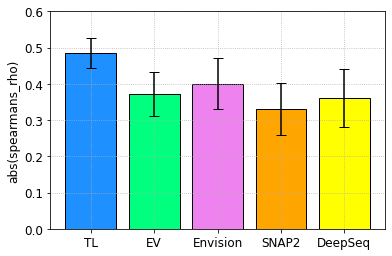

TL: Spearman's rho: 0.485 +/- 0.043
EV: Spearman's rho: 0.373 +/- 0.061
Envision: Spearman's rho: 0.401 +/- 0.071
SNAP2: Spearman's rho: 0.331 +/- 0.071
DeepSeq: Spearman's rho: 0.360 +/- 0.080


In [47]:
color = ['dodgerblue', 'springgreen', 'violet', 'orange', 'yellow']
list = ['TL', 'EV', 'Envision', 'SNAP2', 'DeepSeq']

plt.bar([1,2,3,4,5], plot_ave_spear, yerr=plot_std_spear, align='center', capsize=5, color=color, edgecolor='k')

plt.grid(linestyle=":")

plt.ylabel('abs(spearmans_rho)')
plt.xticks([1,2,3,4,5], list)

plt.ylim(top=0.6)

plt.show()

for i in range(len(list)):
    print(f"{list[i]}: Spearman's rho: {plot_ave_spear[i]:.3f} +/- {plot_std_spear[i]:.3f}")

### Null hypothesis testing

Null hypothesis: There is no difference between randomly labelled and correctly labelled data in terms of the model prediction accuracy

Alternate hypothesis: Correctly labelled is better than randomly labelled 